In [1]:
!pip install tensorflow

***Importing all the Necessary libraries***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import matplotlib.image as mpimg
import random
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array
import pathlib
import numpy as np

***Definning the dataset path***
* *os.walk() function: to traverse a directory tree starting from the path "../input/fruit-recognition".*
* *The current directory path is stored in the variable dirpath, the list of subdirectory names is stored in the variable dirnames, and the list of filenames is stored in the variable filenames.*

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sshikamaru/fruit-recognition")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fruit-recognition


In [4]:
for dirpath, dirnames, filenames in os.walk("/kaggle/input/fruit-recognition/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in '/kaggle/input/fruit-recognition/'.
There are 1 directories and 0 images in '/kaggle/input/fruit-recognition/test'.
There are 0 directories and 5641 images in '/kaggle/input/fruit-recognition/test/test'.
There are 1 directories and 0 images in '/kaggle/input/fruit-recognition/train'.
There are 33 directories and 0 images in '/kaggle/input/fruit-recognition/train/train'.
There are 0 directories and 479 images in '/kaggle/input/fruit-recognition/train/train/Orange'.
There are 0 directories and 738 images in '/kaggle/input/fruit-recognition/train/train/Tomato'.
There are 0 directories and 490 images in '/kaggle/input/fruit-recognition/train/train/Passion Fruit'.
There are 0 directories and 392 images in '/kaggle/input/fruit-recognition/train/train/Cucumber Ripe'.
There are 0 directories and 490 images in '/kaggle/input/fruit-recognition/train/train/Cactus fruit'.
There are 0 directories and 492 images in '/kaggle/input/fruit-recognition/train/train/

***Setting path for TRAIN AND TEST***

In [5]:
train_path = "/kaggle/input/fruit-recognition/train/train/"
test_path = "/kaggle/input/fruit-recognition/test/test/"

***Getting the Different class names from the directory***

In [6]:
data_dir = pathlib.Path(train_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Apple Braeburn' 'Apple Granny Smith' 'Apricot' 'Avocado' 'Banana'
 'Blueberry' 'Cactus fruit' 'Cantaloupe' 'Cherry' 'Clementine' 'Corn'
 'Cucumber Ripe' 'Grape Blue' 'Kiwi' 'Lemon' 'Limes' 'Mango' 'Onion White'
 'Orange' 'Papaya' 'Passion Fruit' 'Peach' 'Pear' 'Pepper Green'
 'Pepper Red' 'Pineapple' 'Plum' 'Pomegranate' 'Potato Red' 'Raspberry'
 'Strawberry' 'Tomato' 'Watermelon']


***Plot a grid of images from a training dataset***

In [7]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 100)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  return img

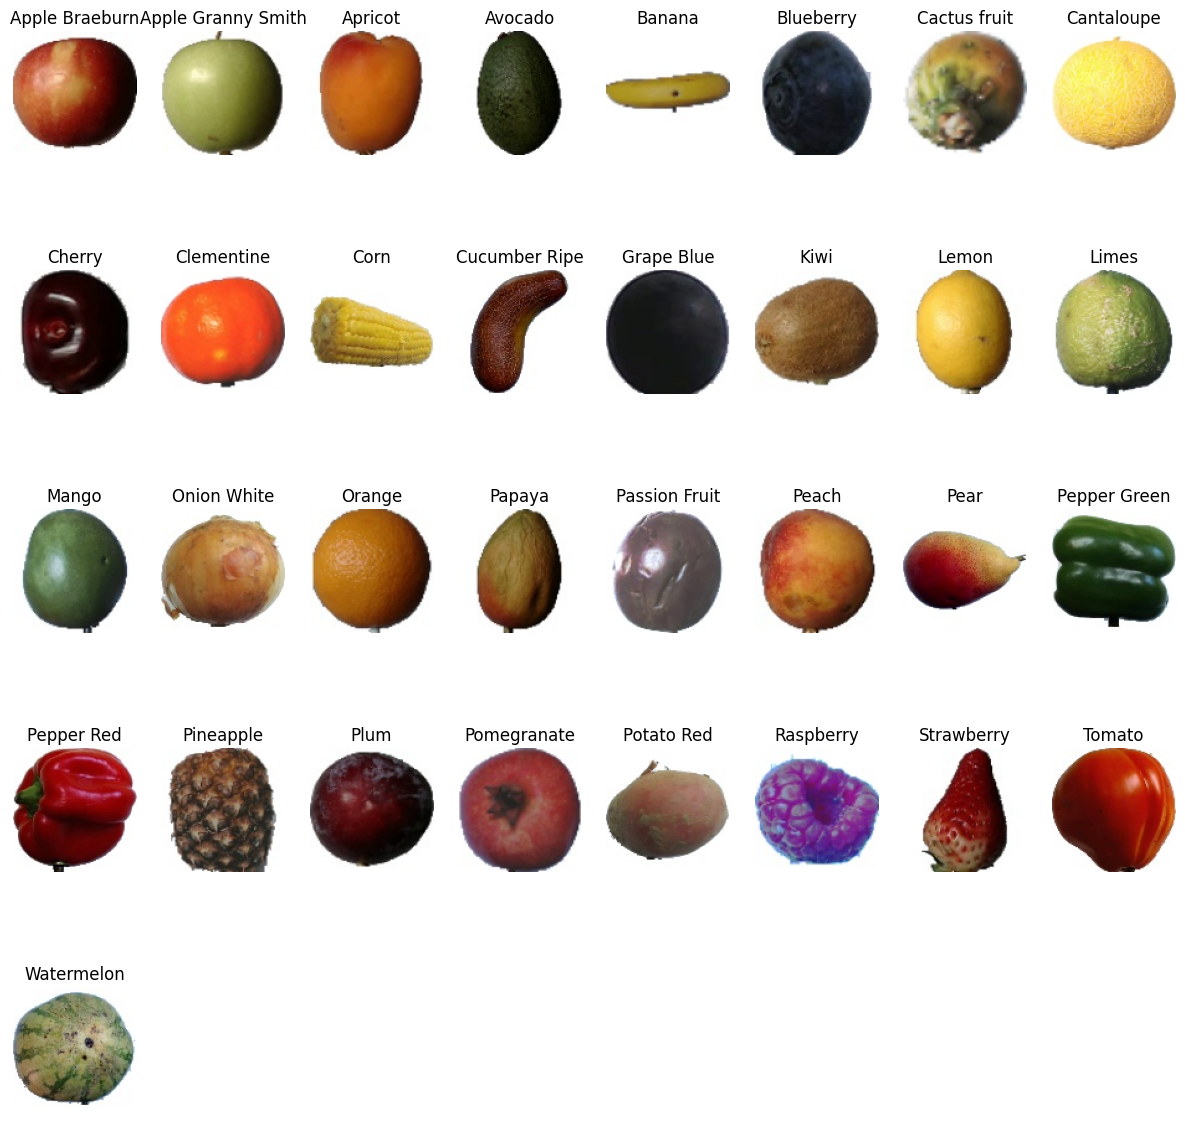

In [8]:
plt.figure(figsize = (15,15))
# View a random image from the training dataset for all classes
for i in range(33):
    plt.subplot(5,8,i+1)
    img = view_random_image(target_dir=train_path,
                        target_class=class_names[i])

***Preparing VALIDATION Data***

*Collects Information about the training dataset by traversing the directory tree using os.walk() and populating a dictionary called train_val_data.*

In [9]:
train_val_data = {'path' : [],
       'filename': [],
       'label': []}
for dirpath, dirnames, filenames in os.walk(train_path):
    for f in filenames:
        train_val_data['path'].append(dirpath)
        train_val_data['filename'].append(f)
        train_val_data['label'].append(f.split('_')[0])

In [10]:
train_val_data_df = pd.DataFrame(train_val_data)
train_val_data_df.head()

path        filename   label
0  /kaggle/input/fruit-recognition/train/train/Or...  Orange_398.jpg  Orange
1  /kaggle/input/fruit-recognition/train/train/Or...   Orange_20.jpg  Orange
2  /kaggle/input/fruit-recognition/train/train/Or...  Orange_337.jpg  Orange
3  /kaggle/input/fruit-recognition/train/train/Or...  Orange_190.jpg  Orange
4  /kaggle/input/fruit-recognition/train/train/Or...  Orange_456.jpg  Orange

***Prepare the Testing Data***

In [11]:
#Read test data and create a dataframe
test_data = {'path' : [],
       'filename': []}
for dirpath, dirnames, filenames in os.walk(test_path):
    for f in filenames:
        test_data['path'].append(dirpath)
        test_data['filename'].append(f)

In [12]:
test_data_df = pd.DataFrame(test_data)
test_data_df.head()

path  filename
0  /kaggle/input/fruit-recognition/test/test/  0664.jpg
1  /kaggle/input/fruit-recognition/test/test/  1269.jpg
2  /kaggle/input/fruit-recognition/test/test/  3863.jpg
3  /kaggle/input/fruit-recognition/test/test/  2193.jpg
4  /kaggle/input/fruit-recognition/test/test/  0733.jpg

***Read Images and create numpy data array***

In [13]:
images = []
label = []

for _, d in train_val_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    images.append(img_to_array(img))
    label.append(d['label'])

In [14]:
images = np.array(images)
labels = np.array(label)
print(f"Complete data images shape: {images.shape} and label shape: {labels.shape}")

Complete data images shape: (16854, 100, 100, 3) and label shape: (16854,)


In [15]:
test_images = []

for _, d in test_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    test_images.append(img_to_array(img))

test_images = np.array(test_images)
print(f"Test images shape: {test_images.shape} ")

Test images shape: (5641, 100, 100, 3) 


***Label Encoding***

In [16]:
class_indices = dict(zip(class_names, range(len(class_names))))
labels_encoded = list(map(class_indices.get, labels))

# Converte os rótulos para one-hot (sem o argumento 'dtype')
label_categorical = tf.keras.utils.to_categorical(labels_encoded, num_classes=len(class_names))

# Se você precisar que os dados estejam em 'uint8', faça a conversão depois
label_categorical = label_categorical.astype('uint8')


***Train And Validation split***

In [17]:
train_im, valid_im, train_lab, valid_lab = train_test_split(images, label_categorical, test_size=0.20,
                                                            stratify=label_categorical,
                                                            random_state=40, shuffle = True)

In [18]:
print ("train data shape after the split: ", train_im.shape)
print ('new validation data shape: ', valid_im.shape)
print ("validation labels shape: ", valid_lab.shape)

train data shape after the split:  (13483, 100, 100, 3)
new validation data shape:  (3371, 100, 100, 3)
validation labels shape:  (3371, 33)


In [19]:
print ('train im and label types: ', type(train_im), type(train_lab))

training_data = tf.data.Dataset.from_tensor_slices((train_im, train_lab))
validation_data = tf.data.Dataset.from_tensor_slices((valid_im, valid_lab))
test_data = tf.data.Dataset.from_tensor_slices(test_images)

print ('check types; ', type(training_data), type(validation_data), type(test_data))

train im and label types:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
check types;  <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>


In [20]:
### check using element_spec
print (training_data.element_spec)
print (validation_data.element_spec)

### as expected, tensors of image and original label shape
### create an iterator and turn it into numpy array
train_iter = iter(training_data)
print(next(train_iter)[0].numpy(), '\n', next(train_iter)[1].numpy(), np.argmax(next(train_iter)[1].numpy()))

(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(33,), dtype=tf.uint8, name=None))
(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(33,), dtype=tf.uint8, name=None))
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]] 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [21]:
train_iter_im, train_iter_label = next(iter(training_data))
print (train_iter_im.numpy().shape, train_iter_label.numpy().shape)

(100, 100, 3) (33,)


In [22]:
train_iter_im1, train_iter_label1 = next(training_data.as_numpy_iterator())
print (train_iter_im1.shape, train_iter_label1.shape)

(100, 100, 3) (33,)


In [23]:
check_list = list(training_data.as_numpy_iterator())
print (len(check_list), check_list[1])

13483 (array([[[254., 255., 255.],
        [254., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 255., 255.],
        [254., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [

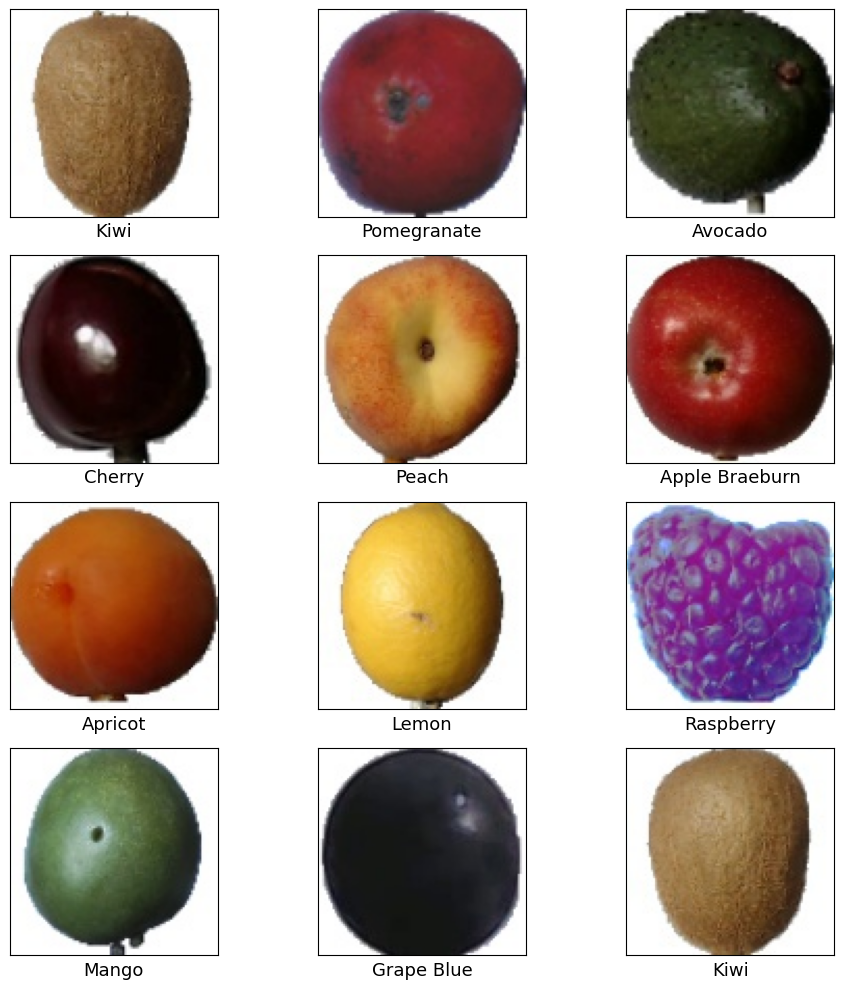

In [24]:

fig = plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(check_list[i][0]/255.)
    plt.xlabel(class_names[np.argmax(check_list[i][1])], fontsize=13)
plt.tight_layout()
plt.show()

***Data Pipeline using`tf.data` & Prefetching***

In [25]:
# Camada de normalização [0, 255] -> [0, 1]
rescale_data = tf.keras.Sequential([
    layers.Rescaling(1./255)
])

# Camada de data augmentation (aceita lote (None, 100, 100, 3) sem problemas)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])


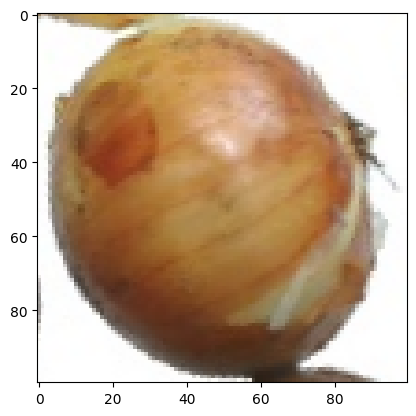

In [26]:
random_image_index = random.randint(0,len(train_im))
img = rescale_data(train_im[random_image_index])
img = data_augmentation(img)
plt.imshow(img)

In [27]:
def prepare(ds, shuffle=False, augment=False, test=False, batch_size=32):
    if shuffle:
        ds = ds.shuffle(buffer_size=100)

    # Se for dataset de teste (sem rótulos)
    if test:
        ds = ds.map(lambda x: rescale_data(x),
                    num_parallel_calls=tf.data.AUTOTUNE)
    else:
        ds = ds.map(lambda x, y: (rescale_data(x), y),
                    num_parallel_calls=tf.data.AUTOTUNE)

    ds = ds.batch(batch_size)

    # Aplica data augmentation somente para conjuntos com rótulos (treino)
    if augment and not test:
        ds = ds.map(
            lambda x, y: (tf.map_fn(lambda img: data_augmentation(img, training=True), x), y),
            num_parallel_calls=tf.data.AUTOTUNE
        )

    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds

In [28]:
train_ds = prepare(training_data, shuffle=True, augment=True, batch_size=32)
val_ds   = prepare(validation_data, batch_size=32)
test_ds  = prepare(test_data, test=True, batch_size=32)

***CNN Model***
* *The model consists of a convolutional layer, a max pooling layer, a flatten layer, and a dense (fully connected) layer with a softmax activation function*

In [29]:
model = tf.keras.Sequential([
    # 1ª camada convolucional
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),

    # 2ª camada convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 3ª camada convolucional
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Achatar a saída para conectar às camadas densas
    layers.Flatten(),

    # Camada densa intermediária
    layers.Dense(128, activation='relu'),

    # Camada de saída ajustada para 33 classes (rótulos one-hot com 33 posições)
    layers.Dense(33, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 33)                  │           4,257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,736,033 (6.62 MB)

 Trainable params: 1,736,033 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

***Fitting The Model***

In [31]:
history_1 = model.fit(
    train_ds,
    epochs=5,
    validation_data=val_ds
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 215s 499ms/step - accuracy: 0.6603 - loss: 1.1647 - val_accuracy: 0.9801 - val_loss: 0.0658
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 211s 498ms/step - accuracy: 0.9763 - loss: 0.0760 - val_accuracy: 0.9772 - val_loss: 0.0717
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 210s 494ms/step - accuracy: 0.9800 - loss: 0.0630 - val_accuracy: 0.9961 - val_loss: 0.0128
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 212s 500ms/step - accuracy: 0.9968 - loss: 0.0123 - val_accuracy: 0.9967 - val_loss: 0.0112
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 209s 492ms/step - accuracy: 0.9899 - loss: 0.0331 - val_accuracy: 0.9988 - val_loss: 0.0036


***Plotting Graph for loss & accuracy***

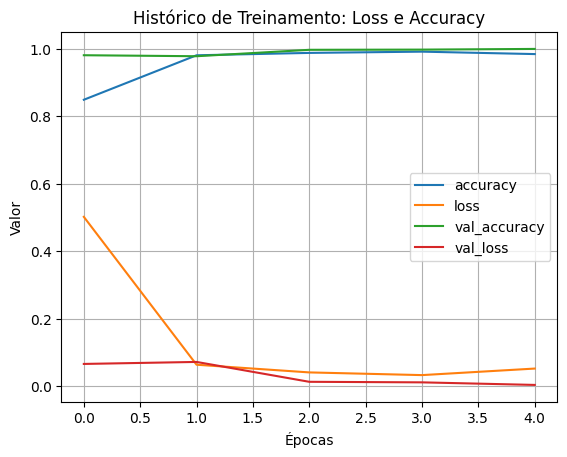

In [32]:
df_history = pd.DataFrame(history_1.history)
df_history.plot()
plt.title("Histórico de Treinamento: Loss e Accuracy")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

***Saving The Model***

In [33]:
model.save('model.h5')

In [36]:
loaded_model = tf.keras.models.load_model('/content/model.h5')

In [37]:
test_ds

<_PrefetchDataset element_spec=TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None)>

In [39]:
import numpy as np

# Supondo que test_ds seja um tf.data.Dataset que retorna apenas as imagens
y_pred = []  # Lista para armazenar as predições

# Percorre cada batch de imagens no dataset de teste
for batch in test_ds:
    # batch possui shape: (batch_size, 100, 100, 3) (se estiver batchado)
    preds = model.predict(batch)
    # Para cada imagem no batch, obtemos o índice da classe com maior probabilidade
    y_pred.extend(np.argmax(preds, axis=1))

print("Predições para as imagens de teste:")
print(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/s

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


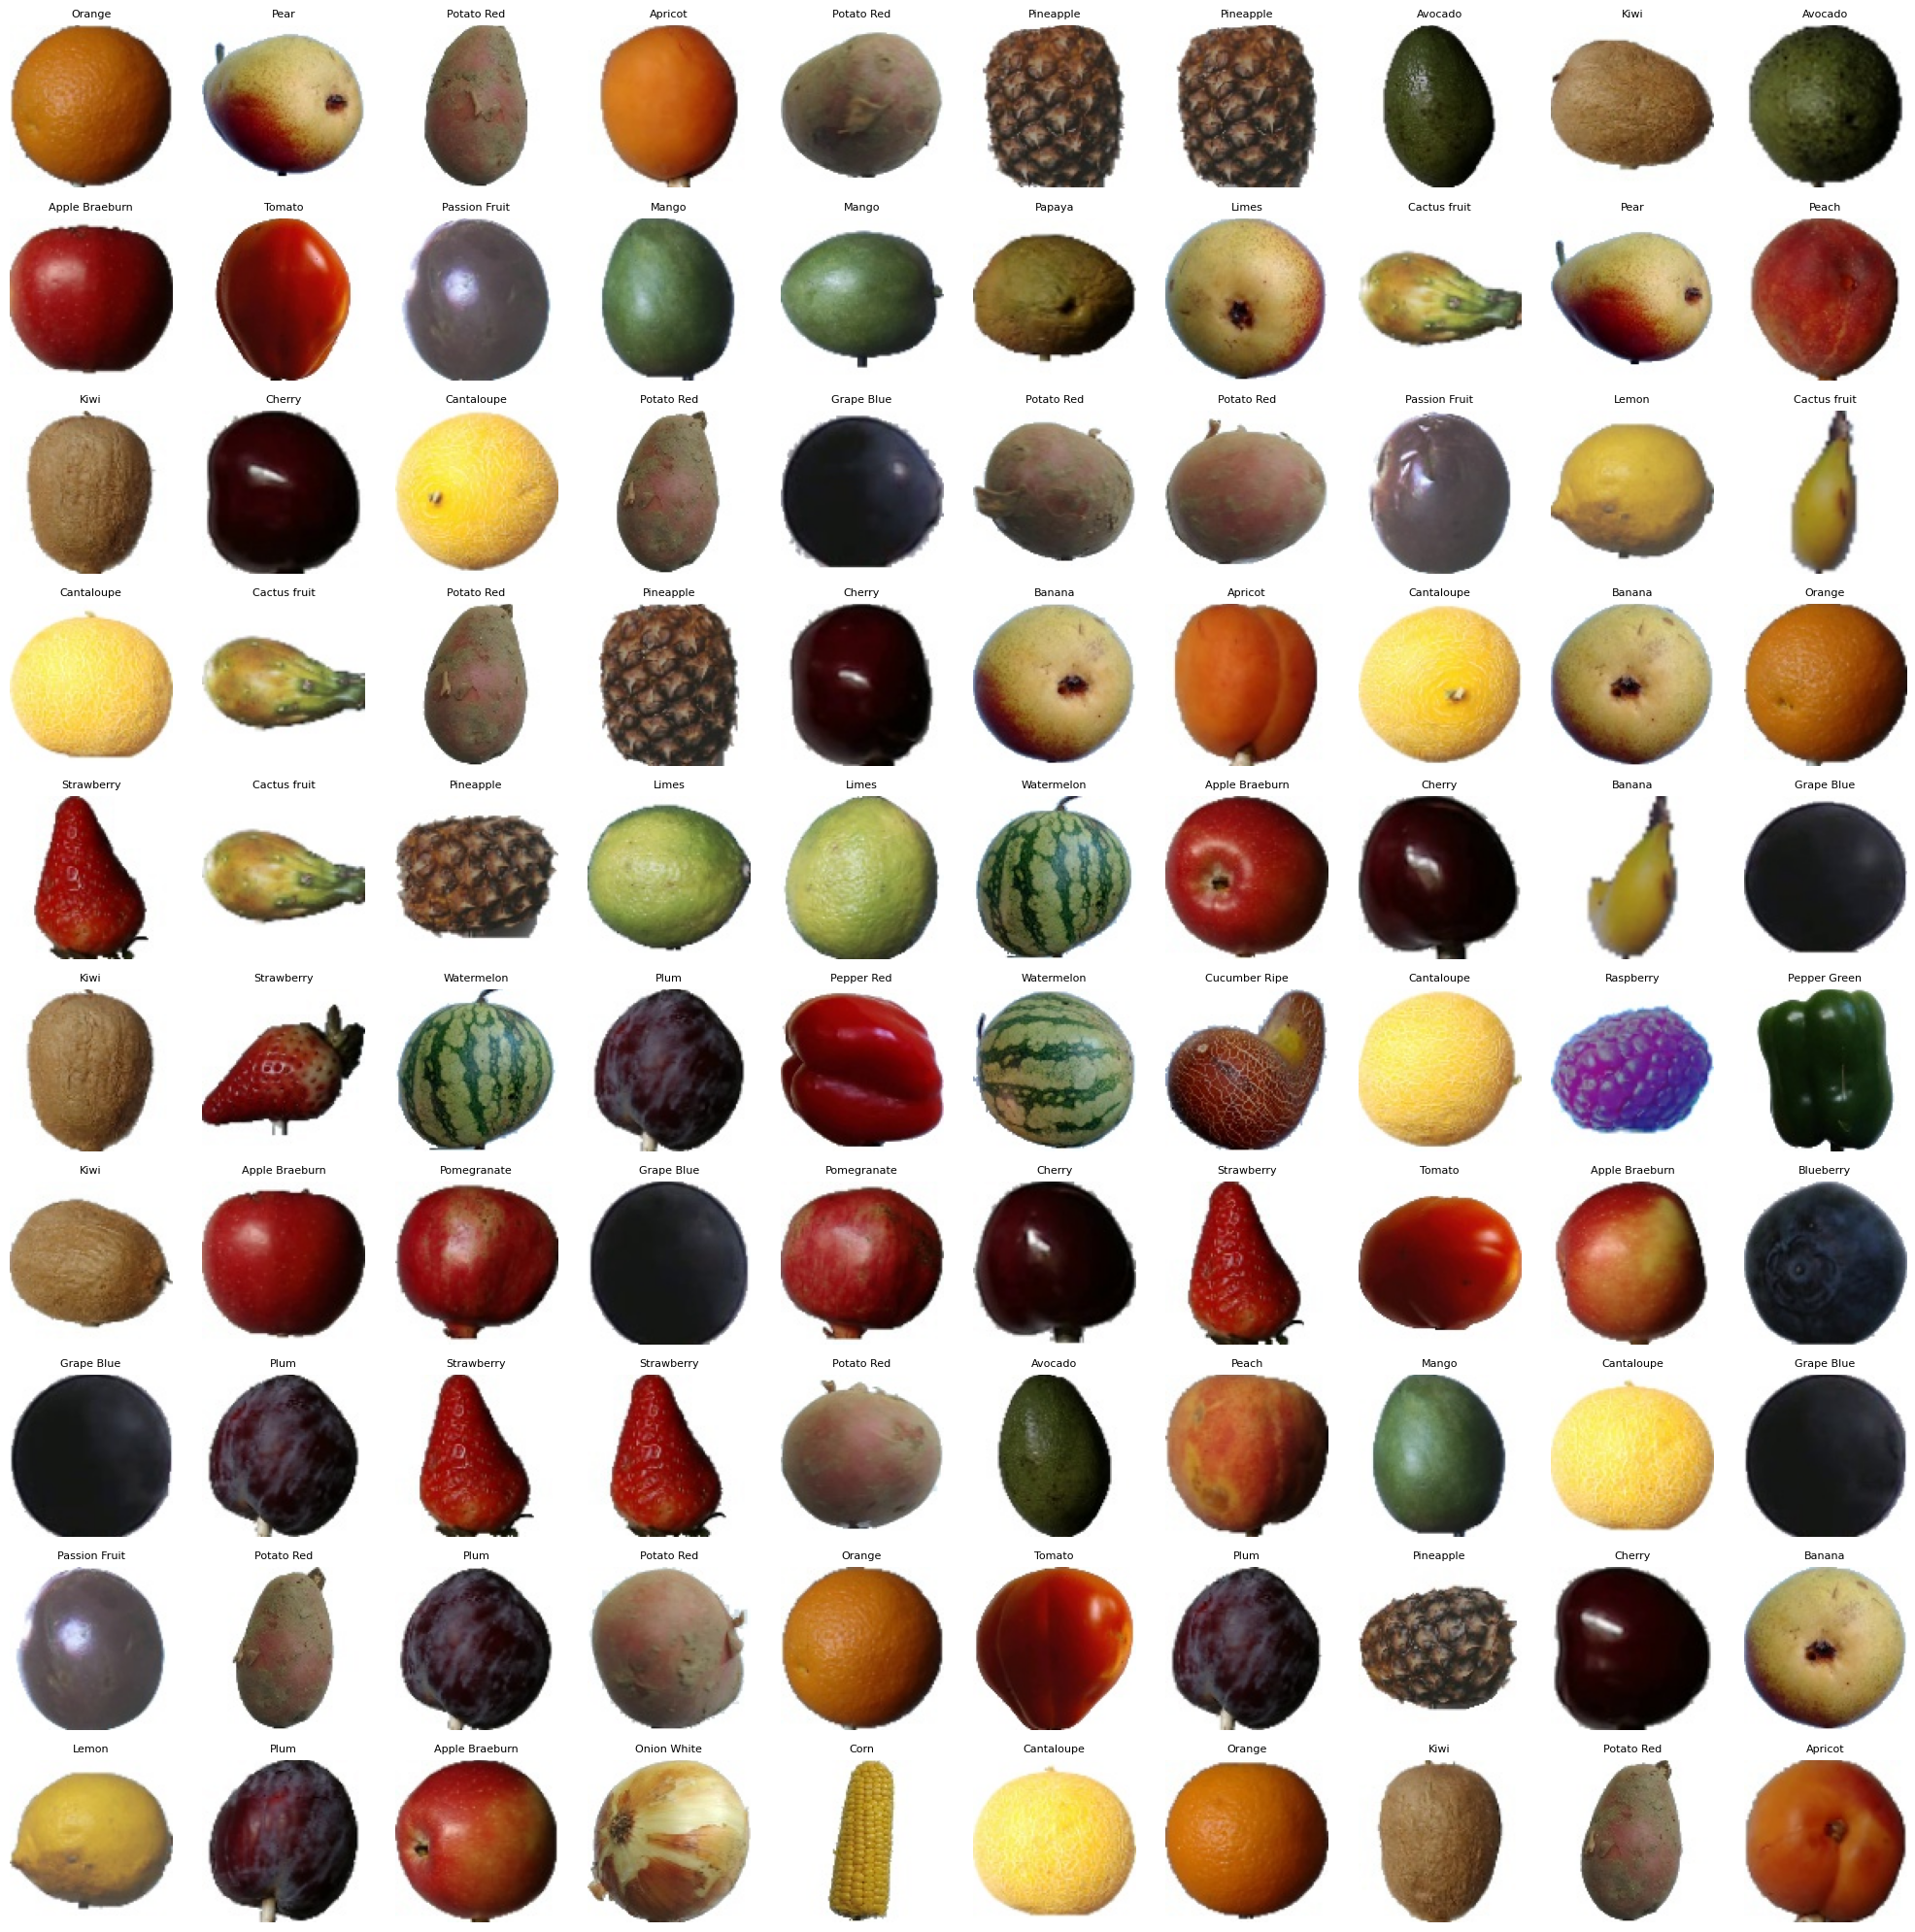

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Supondo que test_ds seja um tf.data.Dataset que retorna apenas as imagens,
# ou seja, cada elemento é uma imagem de shape (100, 100, 3)

# Para garantir que temos 100 imagens, utilizamos o método unbatch() e take(100).
# Isso cria uma lista de 100 imagens.
images_list = list(test_ds.unbatch().take(100))
images = tf.stack(images_list)  # Forma um tensor com shape (100, 100, 100, 3)

# Realiza as predições para essas 100 imagens
predictions = model.predict(images)
pred_classes = np.argmax(predictions, axis=1)

# Configura a figura para exibir 100 imagens (10 linhas x 10 colunas)
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(images[i])
    predicted_label = class_names[pred_classes[i]]
    plt.title(predicted_label, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()
